# 損失関数

損失関数はニューラルネットワークにおいて、モデルの出力と目的値との間の誤差を計測するための関数のことです。
機械学習では入力の値に対して、パラメータを調整して、求める出力の値に近づけていきます。

ここでは、よく使われる損失関数の概要を説明し、TensorFlowで使う場合のサンプルコードを紹介したいと思います。

## 事前準備

まずサンプルコードで使用するパッケージをインポートします。

In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

### 回帰用途の損失関数

In [78]:
#: 予測値
x_vals_r = tf.linspace(-1.0, 1.0, 500)

#: 目的地
target_r = tf.constant(0.0)

#### L2 Loss (ユークリッド損失関数)

In [79]:
l2_y_vals = tf.square(target_r - x_vals_r)
l2_y_out = sess.run(l2_y_vals)

#### L1 Loss (絶対損失関数)

In [80]:
l1_y_vals = tf.abs(target_r - x_vals_r)
l1_y_out = sess.run(l1_y_vals)

#### Pseudo-Huber損失関数

In [81]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(
    tf.square(delta1),
    tf.sqrt(1.0 + tf.square((target_r - x_vals_r) / delta1)) - 1.0
)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.0)
phuber2_y_vals = tf.multiply(
    tf.square(delta2),
    tf.sqrt(1.0 + tf.square((target_r - x_vals_r) / delta2)) - 1.0
)
phuber2_y_out = sess.run(phuber2_y_vals)

### 回帰用途の各損失関数の比較

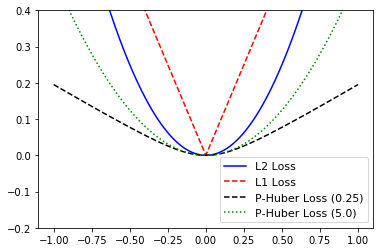

In [82]:
x_array_r = sess.run(x_vals_r)

plt.plot(x_array_r, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array_r, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array_r, phuber1_y_out, 'k--', label='P-Huber Loss (0.25)')
plt.plot(x_array_r, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

### 分類用途の損失関数

In [83]:
#: 予測値
x_vals_c = tf.linspace(-3.0, 5.0, 500)

#: 目的地
target_c = tf.constant(1.0)

targets_c = tf.fill([500,], 1.0)

#### ヒンジ損失関数

[tf.losses.hinge_loss](https://www.tensorflow.org/api_docs/python/tf/losses/hinge_loss)

In [84]:
hinge_y_vals = tf.maximum(0.0, 1.0 -tf.multiply(target_c, x_vals_c))
hinge_y_out = sess.run(hinge_y_vals)

#### 交差エントロピー損失関数

In [85]:
crossentropy_y_vals = -tf.multiply(target_c, tf.log(x_vals_c)) - tf.multiply((1.0 - target_c), tf.log(1.0 - x_vals_c))
crossentropy_y_out = sess.run(crossentropy_y_vals)

#### シグモイド交差エントロピー損失関数

In [86]:
# labels_sig = tf.constant([[0.1, 0.02, 0.88]])
# logits_sig = tf.constant([[1.0, -3.0, 10.0]])

# sigmoid_crossentropy_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(
#     labels=labels_sig,
#     logits=logits_sig
# )
# sigmoid_crossentropy_y_out = sess.run(sigmoid_crossentropy_y_vals)

#### 重み付き交差エントロピー損失関数

In [87]:
pos_weight = tf.constant(0.5)
weighted_crossentropy_y_vals = tf.nn.weighted_cross_entropy_with_logits(
    x_vals_c,
    targets_c,
    pos_weight
)
weighted_crossentropy_y_out = sess.run(weighted_crossentropy_y_vals)

#### ソフトマックス交差エントロピー損失関数

In [88]:
labels_s = tf.constant([[0.1, 0.02, 0.88]])
logits_s = tf.constant([[1.0, -3.0, 10.0]])

softmax_cross_entropy_y_vals = tf.nn.softmax_cross_entropy_with_logits(
    labels=labels_s,
    logits=logits_s
)
softmax_cross_entropy_y_out = sess.run(softmax_cross_entropy_y_vals)

#### 疎なソフトマックス交差エントロピー損失関数

In [89]:
labels_ss = tf.constant([2])
logits_ss = tf.constant([[1.0, -3.0, 10.0]])

sparse_softmax_cross_entropy_y_vals = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=labels_ss,
    logits=logits_ss
)
sparse_softmax_cross_entropy_y_out = sess.run(sparse_softmax_cross_entropy_y_vals)

### 分類用途の各損失関数の比較

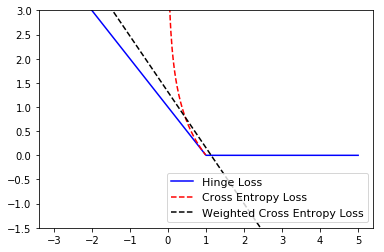

In [90]:
x_array_c = sess.run(x_vals_c)

plt.plot(x_array_c, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array_c, crossentropy_y_out, 'r--', label='Cross Entropy Loss')
# plt.plot(x_array_c, sigmoid_crossentropy_y_out, 'r--', label='Sigmoid Cross Entropy Loss')
plt.plot(x_array_c, weighted_crossentropy_y_out, 'k--', label='Weighted Cross Entropy Loss')
# plt.plot(x_array_c, softmax_cross_entropy_y_out, 'r--', label='Softmax Cross Entropy Loss')
# plt.plot(x_array_c, sparse_softmax_cross_entropy_y_out, 'r--', label='Sparse Softmax Cross Entropy Loss')
plt.ylim(-1.5, 3.0)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## 参照

* [Losses - Neural Network - TensorFlow](https://www.tensorflow.org/api_guides/python/nn#Losses)
* [交差エントロピー - WikiPedia](https://ja.wikipedia.org/wiki/交差エントロピー)
* [損失関数について、ざっくりと考える - Qiita](https://qiita.com/mine820/items/f8a8c03ef1a7b390e372)
* [機械学習で抑えておくべき損失関数（回帰編） - HELLO CYBERNETICS](http://s0sem0y.hatenablog.com/entry/2017/06/19/084210)